In [1]:
import tensorflow as tf
import numpy as np
from model import bioRNN
from training import supervised_train_step
from stp_stimulus import Stimulus
import matplotlib.pyplot as plt
from IPython.display import HTML

--> Loading parameters...
--> Parameters successfully loaded.



In [2]:
# Choose GPU
gpu_idx = 3
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[gpu_idx], 'GPU')

In [3]:
# Data generator
stim = Stimulus() # DMS, go to stp_stimulus and down to 'trial_type' to change it
trial_info = stim.generate_trial()

In [4]:
trial_info.keys()

dict_keys(['desired_output', 'train_mask', 'sample', 'test', 'rule', 'match', 'catch', 'probe', 'neural_input'])

In [5]:
inputs = trial_info['neural_input']
labels = trial_info['desired_output']
mask = trial_info['train_mask']

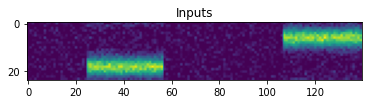

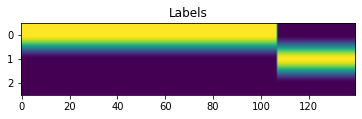

In [6]:
b = np.random.randint(inputs.shape[1])

# Inputs
plt.imshow(inputs[:,b,:].T)
plt.title('Inputs')
plt.show()

# Labels
plt.imshow(labels[:,b,:].T, aspect=10.0)
plt.title('Labels')
plt.show()

In [7]:
# Model hyper-params
hidden_size = 128
output_size = labels.shape[-1]
synapse_config = 'full'

# Optimization hyper-params
learning_rate = 1e-2
n_iterations = 1000

In [8]:
# Define a model
rnn = bioRNN(hidden_size, output_size, synapse_config=synapse_config)
opt = tf.keras.optimizers.Adam(learning_rate=float(learning_rate))

In [9]:
# Train the model
loss_list = []
acc_list = []
print('\n=== TRAINING === \n')
for i in range(n_iterations):
    trial_info = stim.generate_trial()
    inputs = trial_info['neural_input'].astype(np.float32)
    labels = trial_info['desired_output'].astype(np.float32)
    mask = trial_info['train_mask'].astype(np.float32)
    metrics = supervised_train_step(rnn, opt, inputs, labels, train_mask=mask)
    loss = round(float(metrics['loss']), 2)
    acc = round(float(metrics['argmax_accuracy']), 2)
    dec_acc = round(float(metrics['decision_accuracy']), 2)
    fix_acc = round(float(metrics['fixation_accuracy']), 2)
    loss_list.append(loss)
    acc_list.append(acc)
    if i%100==0:
        print(f'Iter: {i} | Loss: {loss} | Acc: {acc} | Fixation Acc: {fix_acc} | Decision Acc: {dec_acc}')


=== TRAINING === 

Iter: 0 | Loss: 1.08 | Acc: 0.34 | Fixation Acc: 0.64 | Decision Acc: 0.3
Iter: 100 | Loss: 0.18 | Acc: 0.88 | Fixation Acc: 0.82 | Decision Acc: 0.89
Iter: 200 | Loss: 0.18 | Acc: 0.87 | Fixation Acc: 0.13 | Decision Acc: 0.97
Iter: 300 | Loss: 0.17 | Acc: 0.87 | Fixation Acc: 0.11 | Decision Acc: 0.98
Iter: 400 | Loss: 0.13 | Acc: 0.93 | Fixation Acc: 0.78 | Decision Acc: 0.95
Iter: 500 | Loss: 0.11 | Acc: 0.94 | Fixation Acc: 0.74 | Decision Acc: 0.96
Iter: 600 | Loss: 0.08 | Acc: 0.96 | Fixation Acc: 0.78 | Decision Acc: 0.98
Iter: 700 | Loss: 0.06 | Acc: 0.97 | Fixation Acc: 0.86 | Decision Acc: 0.98
Iter: 800 | Loss: 0.06 | Acc: 0.97 | Fixation Acc: 0.9 | Decision Acc: 0.98
Iter: 900 | Loss: 0.05 | Acc: 0.97 | Fixation Acc: 0.92 | Decision Acc: 0.98


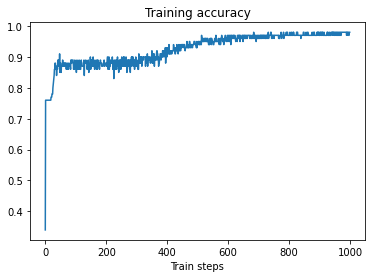

In [10]:
# Plot accuracies
plt.plot(acc_list)
plt.title('Training accuracy')
plt.xlabel('Train steps')
plt.show()

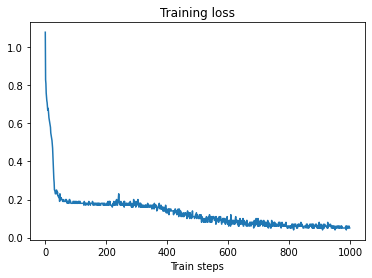

In [11]:
# Plot loss
plt.plot(loss_list)
plt.title('Training loss')
plt.xlabel('Train steps')
plt.show()

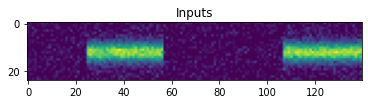

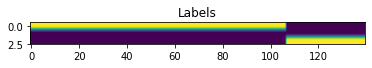

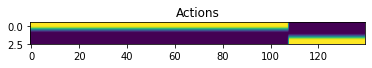

In [12]:
# Look at an example trial with the model's actions
trial_info = stim.generate_trial()
inputs = trial_info['neural_input'].astype(np.float32)
labels = trial_info['desired_output'].astype(np.float32)
mask = trial_info['train_mask'].astype(np.float32)
results = rnn.do_trial(inputs)
action_idxs = tf.math.argmax(results['outputs'], axis=-1) # (T, B)
actions = tf.one_hot(action_idxs, output_size)

b = np.random.randint(inputs.shape[1])

# Inputs
plt.imshow(inputs[:,b,:].T)
plt.title('Inputs')
plt.show()

# Labels
plt.imshow(labels[:,b,:].T, aspect=3.0)
plt.title('Labels')
plt.show()

# Actions
plt.imshow(actions[:,b,:].numpy().T, aspect=3.0)
plt.title('Actions')
plt.show()

In [13]:
s,u,v = tf.linalg.svd(rnn.w_rnn)

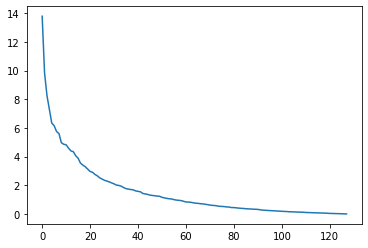

In [14]:
plt.plot(s)

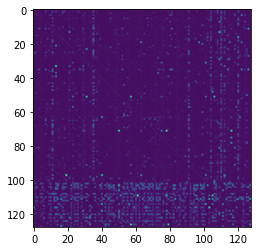

In [15]:
plt.imshow(rnn.w_rnn.numpy())

In [16]:
np.mean(rnn.w_rnn.numpy())

0.01782106

In [26]:
np.amin(rnn.w_rnn.numpy())

-0.20420727

In [27]:
np.amax(rnn.w_rnn.numpy())

3.6359673

(array([1.0000e+00, 1.9900e+02, 1.4025e+04, 3.4900e+02, 2.8800e+02,
        2.6700e+02, 2.5600e+02, 2.3300e+02, 1.9000e+02, 1.4700e+02,
        1.1600e+02, 7.5000e+01, 5.4000e+01, 4.4000e+01, 2.9000e+01,
        1.4000e+01, 2.0000e+01, 1.4000e+01, 9.0000e+00, 1.3000e+01,
        6.0000e+00, 1.0000e+01, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,
         0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,
         1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,
         3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7]),
 <BarContainer object of 40 artists>)

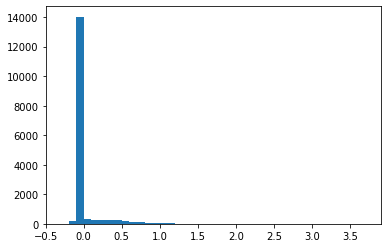

In [28]:
plt.hist(rnn.w_rnn.numpy().flatten(), bins=[0.1*i for i in range(-3,38)])